In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Coletando os links de cada um dos Gêneros (1000 músicas mais acesssadas)

In [3]:
url_list = []
url = 'https://www.letras.mus.br/estilos/'
site = requests.get(url)
soup = BeautifulSoup(site.text)

songs = soup.find('ul',{'class':'cnt-list cnt-list--col2'})
for link in songs.find_all('a'):
    links = link.get('href')
    url_list.append('https://www.letras.mus.br/mais-acessadas/'+links.split('/')[-2]+'/')

In [4]:
url_list

['https://www.letras.mus.br/mais-acessadas/alternativo/',
 'https://www.letras.mus.br/mais-acessadas/axe/',
 'https://www.letras.mus.br/mais-acessadas/blues/',
 'https://www.letras.mus.br/mais-acessadas/bolero/',
 'https://www.letras.mus.br/mais-acessadas/bossa-nova/',
 'https://www.letras.mus.br/mais-acessadas/brega/',
 'https://www.letras.mus.br/mais-acessadas/classico/',
 'https://www.letras.mus.br/mais-acessadas/country/',
 'https://www.letras.mus.br/mais-acessadas/cuarteto/',
 'https://www.letras.mus.br/mais-acessadas/cumbia/',
 'https://www.letras.mus.br/mais-acessadas/dance/',
 'https://www.letras.mus.br/mais-acessadas/disco/',
 'https://www.letras.mus.br/mais-acessadas/eletronica/',
 'https://www.letras.mus.br/mais-acessadas/emocore/',
 'https://www.letras.mus.br/mais-acessadas/fado/',
 'https://www.letras.mus.br/mais-acessadas/folk/',
 'https://www.letras.mus.br/mais-acessadas/forro/',
 'https://www.letras.mus.br/mais-acessadas/funk/',
 'https://www.letras.mus.br/mais-acessada

### Para cada um dos Gêneros, coletando os links das Músicas

In [5]:
genre_musics = {}
for genre in url_list:
    url_lyrics = []
    url = genre
    site = requests.get(url)
    soup = BeautifulSoup(site.text)
    
    k = 0
    songs = soup.find('ol',{'class':'top-list_mus cnt-list--col1-3'})
    for link in songs.find_all('a'):
        links = link.get('href')
        url_lyrics.append('https://www.letras.mus.br'+links)
        k += 1
        if k == 100:
            break
            
    genre_musics[genre.split('/')[-2]] = url_lyrics

In [6]:
genre_musics

{'alternativo': ['https://www.letras.mus.br/jack-johnson/122710/',
  'https://www.letras.mus.br/hozier/take-me-to-church/',
  'https://www.letras.mus.br/francisco-el-hombre/triste-louca-ou-ma/',
  'https://www.letras.mus.br/4-non-blondes/1129164/',
  'https://www.letras.mus.br/gabrielle-aplin/home/',
  'https://www.letras.mus.br/radiohead/63485/',
  'https://www.letras.mus.br/passenger/let-her-go/',
  'https://www.letras.mus.br/rem/97/',
  'https://www.letras.mus.br/sub-urban/cradles/',
  'https://www.letras.mus.br/twenty-one-pilots/stressed-out/',
  'https://www.letras.mus.br/audioslave/69438/',
  'https://www.letras.mus.br/jack-johnson/472178/',
  'https://www.letras.mus.br/twenty-one-pilots/ride/',
  'https://www.letras.mus.br/wallows/are-you-bored-yet-feat-clairo/',
  'https://www.letras.mus.br/hoobastank/82303/',
  'https://www.letras.mus.br/tame-impala/the-less-i-know-the-better/',
  'https://www.letras.mus.br/twenty-one-pilots/heathens/',
  'https://www.letras.mus.br/gorillaz/16

### Para cada uma das Músicas, coletando as Letras

In [16]:
lyrics_dict = {}
for genre in genre_musics.keys():
    k=0
    for musics_url in genre_musics[genre]:
        if k==100: # Get only 100 top musics from each genre
            break
        
        site = requests.get(musics_url)
        soup = BeautifulSoup(site.text)
        
        try:
            song = soup.find('div',{'class':'cnt-letra p402_premium'})
            lyric = str(song).strip('</div>').strip(' </p>').replace('<br/>','. ').replace('</p><p>','. ').replace('<p>','')
            lyric = lyric.replace('class="cnt-letra p402_premium"> ','')
        except:
            lyric = 'Lyric Not Found'
        
        try:
            name_1 = soup.find('div',{'class':'cnt-head_title'})
            name_2 = name_1.find('h1') 
            title = str(name_2).strip('</h1>')
        except:
            title = 'Title Not Found'
        
        lyrics_dict[title] = [musics_url.split('/')[-3].title().replace('-',' '),genre,lyric]
        
        k+=1

### Exemplo de Coleta de Letra

In [8]:
musics_url = 'https://www.letras.mus.br/chico-science/45205/'
  
site = requests.get(musics_url)
soup = BeautifulSoup(site.text)

title = str(soup.find('div',{'class':'cnt-head_title'}).find('h1')).strip('</h1>')
print(title,'\n')

song = soup.find('div',{'class':'cnt-letra p402_premium'})
lyric = str(song).strip('</div>').strip(' </p>').replace('<br/>','. ').replace('</p><p>','. ').replace('<p>','')
lyric = lyric.replace('class="cnt-letra p402_premium"> ','')
print(lyric)

A Cidade 

O sol nasce e ilumina. As pedras evoluídas. Que cresceram com a força. De pedreiros suicidas. Cavaleiros circulam. Vigiando as pessoas. Não importa se são ruins. Nem importa se são boas. E a cidade se apresenta. Centro das ambições. Para mendigos ou ricos. E outras armações. Coletivos, automóveis,. Motos e metrôs. Trabalhadores, patrões,. Policiais, camelôs. A cidade não pára. A cidade só cresce. O de cima sobe. E o de baixo desce. A cidade não pára. A cidade só cresce. O de cima sobe. E o de baixo desce. A cidade se encontra. Prostituída. Por aqueles que a usaram. Em busca de uma saída. Ilusora de pessoas. De outros lugares,. A cidade e sua fama. Vai além dos mares. E no meio da esperteza. Internacional. A cidade até que não está tão mal. E a situação sempre mais ou menos. Sempre uns com mais e outros com menos. A cidade não pára. A cidade só cresce. O de cima sobe. E o de baixo desce. A cidade não pára. A cidade só cresce. O de cima sobe. E o de baixo desce. Eu vou fazer u

In [22]:
print('O total de músicas coletadas é:',len(lyrics_dict))

O total de músicas coletadas é: 6157


### Criando a Tabela dos Dados

In [81]:
df = pd.DataFrame(lyrics_dict).T.reset_index()
df.columns = ['Name','Artist','Genre','Lyrics']
df

,Name,Artist,Genre,Lyrics
0,Better Together,Jack Johnson,rock,There's no combination of words I could put on...
1,Take Me To Churc,Hozier,rock,My lover's got humour. She's the giggle at a f...
2,"Triste, Louca Ou Má",Francisco El Hombre,rock,"Triste, louca ou má. Será qualificada ela. Que..."
3,What's Up?,4 Non Blondes,rock,Twenty-five years and my life is still. I'm tr...
4,Home,Gabrielle Aplin,rock,I’m a phoenix in the water. A fish that’s lear...
...,...,...,...,...
6152,Lovers Rock,Sublime With Rome,ska,The only thing she told me bout this sick sad ...
6153,Mr. Smiley,Mustard Plug,ska,I remember how it used to be. And all the thin...
6154,Suckers,Reel Big Fish,ska,Spoken:. Aaron: This one's for all the suckers...
6155,Who's Next,Sim,ska,(You are dead already). After an idiot vanishe...


### Removendo Pontuações

In [82]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', ',',"'"))
    return final

df['Lyrics'] = df['Lyrics'].apply(remove_punctuation)
df

,Name,Artist,Genre,Lyrics
0,Better Together,Jack Johnson,rock,Theres no combination of words I could put on ...
1,Take Me To Churc,Hozier,rock,My lovers got humour Shes the giggle at a fune...
2,"Triste, Louca Ou Má",Francisco El Hombre,rock,Triste louca ou má Será qualificada ela Quem r...
3,What's Up?,4 Non Blondes,rock,Twenty-five years and my life is still Im tryi...
4,Home,Gabrielle Aplin,rock,I’m a phoenix in the water A fish that’s learn...
...,...,...,...,...
6152,Lovers Rock,Sublime With Rome,ska,The only thing she told me bout this sick sad ...
6153,Mr. Smiley,Mustard Plug,ska,I remember how it used to be And all the thing...
6154,Suckers,Reel Big Fish,ska,Spoken Aaron This ones for all the suckers who...
6155,Who's Next,Sim,ska,(You are dead already) After an idiot vanished...


### Removendo Stop Words
Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como “The” e “a” ((em inglês) ou “O/A” e “Um/Uma” ((em português).

In [150]:
from spacy.lang.pt import Portuguese
from spacy.lang.en import English

In [58]:
en_stopwords = set(stopwords.words('english'))
pt_stopwords = set(stopwords.words('portuguese'))

In [60]:
stopwords = list(en_stopwords)+list(pt_stopwords)

In [85]:
df.Lyrics = [[word for word in lista if word.isalpha() and word not in stopwords] for lista in [lyric.split(' ') for lyric in df.Lyrics]]

In [96]:
df.Lyrics = [(' ').join(lyric) for lyric in df.Lyrics]

In [100]:
df

,Name,Artist,Genre,Lyrics
0,Better Together,Jack Johnson,rock,Theres combination words I could put back post...
1,Take Me To Churc,Hozier,rock,My lovers got humour Shes giggle funeral Knows...
2,"Triste, Louca Ou Má",Francisco El Hombre,rock,Triste louca má Será qualificada Quem recusar ...
3,What's Up?,4 Non Blondes,rock,years life still Im trying get great big hill ...
4,Home,Gabrielle Aplin,rock,phoenix water A fish learnt fly And always dau...
...,...,...,...,...
6152,Lovers Rock,Sublime With Rome,ska,The thing told bout sick sad world Is caught c...
6153,Mr. Smiley,Mustard Plug,ska,I remember used And things said You always tau...
6154,Suckers,Reel Big Fish,ska,Spoken Aaron This ones suckers still believe l...
6155,Who's Next,Sim,ska,dead After idiot vanished alien arrived After ...


### Análise de Sentimentos

In [108]:
from textblob import TextBlob
df['Text_Blob'] = [TextBlob(i).sentiment.polarity for i in df.Lyrics]

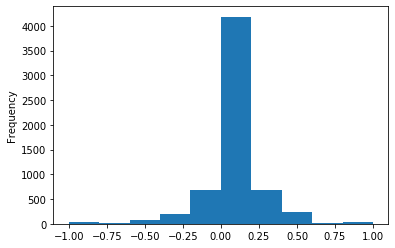

In [178]:
df.Text_Blob.plot(kind='hist',bins=10);

In [168]:
score = []
for i in df.Text_Blob:
    if int(i)>=0.075:
        score.append('Muito Positivo')
    elif int(i)<0.075 and int(i)>=0.05:
        score.append('Positivo')
    elif int(i)<0.05 and int(i)>=0.025:
        score.append('Neutro')
    elif int(i)<0.025 and int(i)>=0:
        score.append('Negativo')
    elif int(i)<0:
        score.append('Muito Negativo')
df['Score'] = score

In [176]:
df[df.Score=='Negativo'].head()

,Name,Artist,Genre,Lyrics,Text_Blob,Score
0,Better Together,Jack Johnson,rock,Theres combination words I could put back post...,0.278251,Negativo
1,Take Me To Churc,Hozier,rock,My lovers got humour Shes giggle funeral Knows...,-0.047799,Negativo
2,"Triste, Louca Ou Má",Francisco El Hombre,rock,Triste louca má Será qualificada Quem recusar ...,0.100000,Negativo
3,What's Up?,4 Non Blondes,rock,years life still Im trying get great big hill ...,0.185432,Negativo
4,Home,Gabrielle Aplin,rock,phoenix water A fish learnt fly And always dau...,0.018750,Negativo


In [177]:
df[df.Score=='Muito Negativo'].head()

,Name,Artist,Genre,Lyrics,Text_Blob,Score
350,El Huerfanito,Antonio Machin,bolero,Yo tengo padre Yo tengo madre Yo tengo nadie Q...,-1.0,Muito Negativo
462,Pra Machucar Meu Coração (part. Stan Getz e An...,Joao Gilberto,bossa-nova,Tá fazendo ano meio amor Que lar desmoronou Me...,-1.0,Muito Negativo
792,A mi Corrientes Pora,Soledad,cuarteto,A mi Corrientes Porá en donde conocí correntin...,-1.0,Muito Negativo
874,Par-Tusa,El Dipy,cumbia,Y otra vez Dipy papá Hoy voy ruta No importa l...,-1.0,Muito Negativo
1367,Canção Do Mar,Dulce Pontes,fado,Fui bailar batel Além mar cruel E mar bramindo...,-1.0,Muito Negativo
